# Credit Card Fraud Detection (Solutions)
**Kaggle dataset**<br>
**Dataset is PCA components**<br>

**Import all the necessary libraries.**



In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression as LogReg
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, scale

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\users\amay\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#for plotting confusion matrix
from mlxtend.plotting import plot_confusion_matrix


In [3]:
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
# pipeline of StandardScaler and LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression as LogReg
# Perform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import ElasticNet as Elastic_Reg

# pipeline of StandardScaler and LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


## Extract Data 


Step 1
1. draw histogram of all features
2. check outliers and remove them if they are 3 std dev away
3. check VIF of the predictors

4. undersampling is one way
5. Or grid search with CV and regualrization with Log Reg, SVM
6. Random forest

1. one way is normailze only amount

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## DATA EXPLORATION/VISUALIZATION

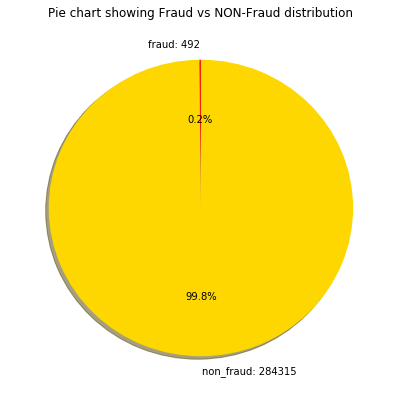

In [7]:
fraud = data[data['Class']==1]
non_fraud = data[data['Class']==0]

amt_fraud = data.Amount[data['Class']==1].sum()
amt_non_fraud = data.Amount[data['Class']==0].sum()

fr = fraud.shape[0]
n_fr = non_fraud.shape[0]

amt_fr = data.Amount[data.Class == 1]
amt_n_fr = data.Amount[data.Class == 0]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(221)
ax1.pie([fr,n_fr],
        labels=['fraud: ' + str(fr), 'non_fraud: ' + str(n_fr)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

ax1.set_title('Pie chart showing Fraud vs NON-Fraud distribution')

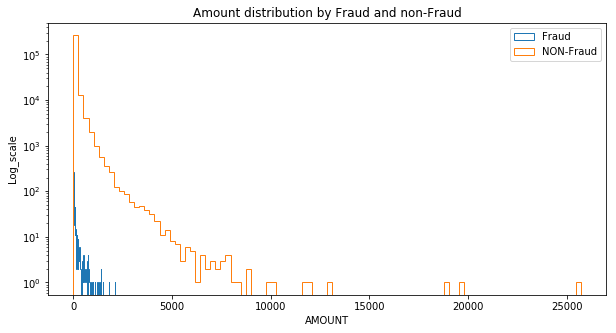

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(data.Amount[data['Class']==1],histtype='step',bins=100,label='Fraud')
plt.hist(data.Amount[data['Class']==0],histtype='step',bins=100,label='NON-Fraud')


plt.yscale('log')
plt.xlabel('AMOUNT')
plt.ylabel('Log_scale')
plt.title('Amount distribution by Fraud and non-Fraud')
plt.legend()
plt.show()

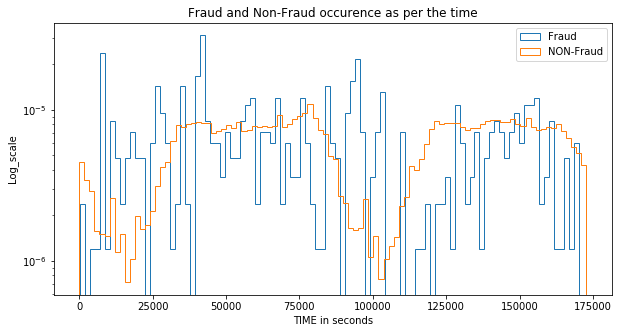

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(data.Time[data['Class']==1],histtype='step',bins=100,normed=1,label='Fraud')
plt.hist(data.Time[data['Class']==0],histtype='step',bins=100,normed=1,label='NON-Fraud')


plt.yscale('log')
plt.xlabel('TIME in seconds')
plt.ylabel('Log_scale')
plt.title('Fraud and Non-Fraud occurence as per the time')
plt.legend()
plt.show()

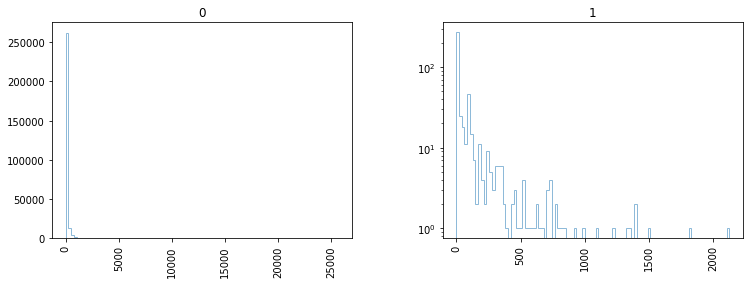

In [10]:
data.hist(column='Amount', by='Class',histtype='step', bins=100,figsize=(12,4),alpha = 0.5)
plt.yscale('log')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002340176FDD8>,
      dtype=object)

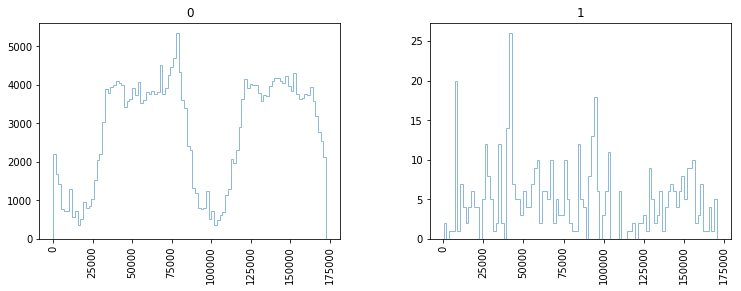

In [11]:
data.hist(column='Time', by='Class',histtype='step', bins=100,figsize=(12,4),alpha = 0.5)

#### From this chart, at inital time it seems that fraud takes places when there is low amount of normal transcation but as time passes, we cannot see this trend. Therefore, we can manually remove Time as one of the predictor since we do not see direct coorelation.
#### But still we should variation inflation factor to confirm our finding.

## Imputation of Data.
### We need to check if there are any nulls in the data columns

In [12]:
#Replace blanks with NaNs
data = data.replace('_', np.nan)

col_analysis = []
for column in data.columns:
    numNulls = len(data[column][data[column].isnull()])
    totalLength = len(data[column])
    dict1 = {'Name':column,'DataType':data[column].dtype, 'NumberOfNulls':numNulls, 'PercentageNulls':numNulls*100.0/totalLength}
    col_analysis.append(dict1)
    
col_anal_df = pd.DataFrame(col_analysis)[['Name', 'DataType','NumberOfNulls','PercentageNulls']].sort_values(by='PercentageNulls', ascending=False)

useful_cols = col_anal_df[col_anal_df.PercentageNulls < 50.0]

print ('List of Predictors and their respective percentages of missing values')
display(useful_cols)

for cols in data.columns.values:
    if (np.any(useful_cols.Name.values == cols) == False):
        data.drop(cols, axis=1, inplace=True)

List of Predictors and their respective percentages of missing values


,Name,DataType,NumberOfNulls,PercentageNulls
0,Time,float64,0,0.0
16,V16,float64,0,0.0
29,Amount,float64,0,0.0
28,V28,float64,0,0.0
27,V27,float64,0,0.0
26,V26,float64,0,0.0
25,V25,float64,0,0.0
24,V24,float64,0,0.0
23,V23,float64,0,0.0
22,V22,float64,0,0.0


## Check Multi-collinarity

In [13]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X = data.drop(['Class'],axis=1)
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


vif.sort_values(by=['VIF Factor'],ascending=False,inplace=True)
validVariables = vif[vif["VIF Factor"]<=5]
variablesWithMC  = vif[vif["VIF Factor"]>5]

   

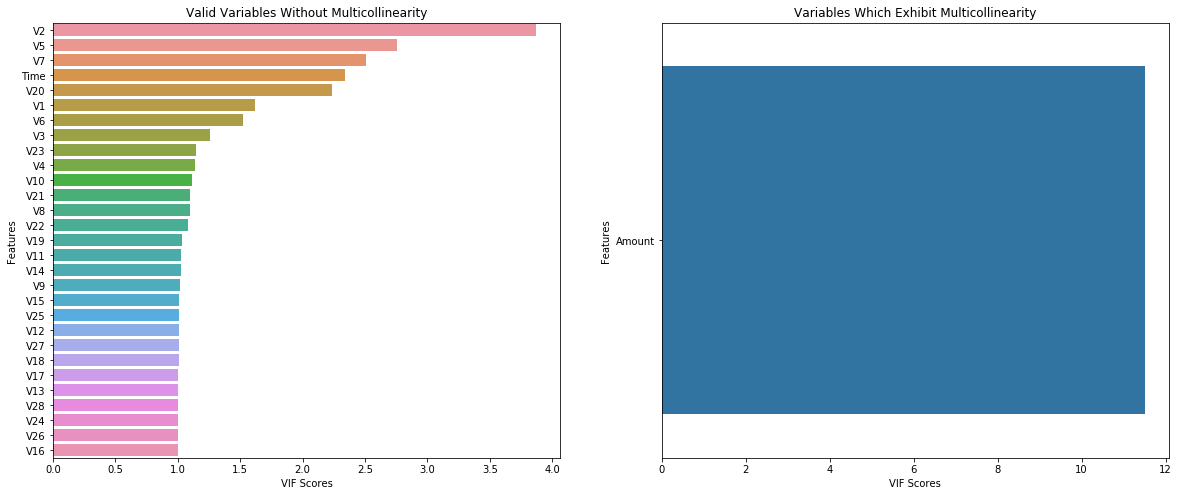

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=validVariables,x="VIF Factor",y="features",ax=ax1,orient="h")
sns.barplot(data=variablesWithMC.head(5),x="VIF Factor",y="features",ax=ax2,orient="h")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

## Scaling amount

In [15]:
datanew= data.copy()
sc= StandardScaler()
#Now to test the model with the whole dataset
datanew["scaled_Amount"]=  sc.fit_transform(datanew["Amount"].values.reshape(-1,1))

#dropping time and old amount column
#datanew= datanew.drop(["Time","Amount"], axis= 1)
datanew.columns

X = datanew.drop(['Class','Amount','Time'], axis=1)
y = datanew['Class']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

In [16]:
print(X_train.columns)
print(X_test.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_Amount'],
      dtype='object')
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_Amount'],
      dtype='object')


## Function to plot confusion matrix and recall %

In [17]:
def confusion_matrix(y_test,y_pred_class):   
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred_class)
    recall = [cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])]
    precision = [cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])]
    accuracy = [(cnf_matrix[1,1] + cnf_matrix[0,0]) /(cnf_matrix[0,1]+cnf_matrix[1,1] +cnf_matrix[1,0] + cnf_matrix[0,0])]
    print("Accuracy % is: ",np.round(np.multiply(accuracy,100),3))
    print("-------------------")
    print("Recall % is: ",np.round(np.multiply(recall,100),3))
    print("-------------------")
    print("Precision % is: ",np.round(np.multiply(precision,100),3))
    print("-------------------")
    print("COnfusion matrix")
    fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix)
    plt.show()
    print("-------------------")
    print("Classification report")
    print(metrics.classification_report(y_test,y_pred_class))

## WHY RECALL??

Accuracy % is:  [99.915]
-------------------
Recall % is:  [57.778]
-------------------
Precision % is:  [82.979]
-------------------
COnfusion matrix


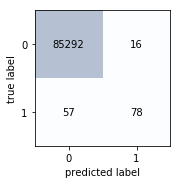

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.83      0.58      0.68       135

avg / total       1.00      1.00      1.00     85443



In [18]:
plain_logreg = LogReg()
plain_logreg.fit(X_train,y_train)
plain_y_pred =  plain_logreg.predict(X_test)
confusion_matrix(y_test,plain_y_pred)

## Another way to use logistic regression is with prediciting CLASS using linear regression first and then binarizing it

In [19]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_pred_train_linreg = linreg.predict(X_train)

X_train2= X_train.copy()
X_train2['y_pred_class'] = np.where(y_pred_train_linreg >= 0.01, 1.0, 0.0)

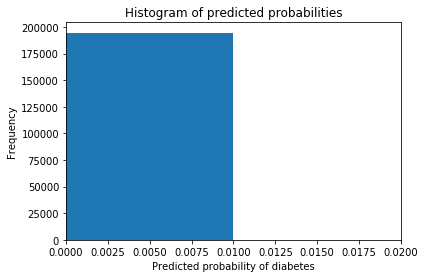

In [20]:
# histogram of predicted probabilities
plt.hist(X_train2['y_pred_class'], bins=100)
plt.xlim(0, 0.02)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Accuracy % is:  [97.824]
-------------------
Recall % is:  [88.148]
-------------------
Precision % is:  [6.065]
-------------------
COnfusion matrix


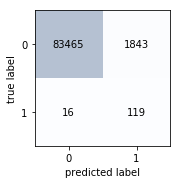

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85308
          1       0.06      0.88      0.11       135

avg / total       1.00      0.98      0.99     85443



In [21]:
log_reg_1 = LogReg()
log_reg_1.fit(X_train,X_train2.y_pred_class)

new_y_pred_test = log_reg_1.predict(X_test)
confusion_matrix(y_test,new_y_pred_test)

## FUTURE Work of thresholding
### Want to create a slider for changing threshold which can show a tradeoff improvement between recall and precision

## Use logistic regression with Regularization with l1 or l2 penalty (shrinkage of coefficents)

In [22]:
def gridsearch_log_reg(X_train,y_train,X_test):
    # grid search for best combination of C and penalty
    pipe = make_pipeline(LogReg())
    from sklearn.grid_search import GridSearchCV
    C_range = 10.**np.arange(-2, 3)
    penalty_options = ['l1', 'l2']
    param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
    grid.fit(X_train, y_train)
    
   #store the predicted probabilities for class 1
    y_pred_prob = grid.predict_proba(X_test)[:, 1]
    return y_pred_prob

In [23]:
def binarizing(y_pred_prob,threshold):
    from sklearn.preprocessing import binarize
    y_pred_class = binarize([y_pred_prob], threshold)[0].astype(int)
    return y_pred_class

## Use logistic regression to directly predict probablity and binarize it

Accuracy % is:  [1.376]
-------------------
Recall % is:  [100.]
-------------------
Precision % is:  [0.16]
-------------------
COnfusion matrix


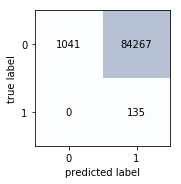

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.01      0.02     85308
          1       0.00      1.00      0.00       135

avg / total       1.00      0.01      0.02     85443



In [24]:
y_pred_prob = gridsearch_log_reg(X_train,y_train,X_test)
y_pred_class = binarizing(y_pred_prob,0.001)
confusion_matrix(y_test,y_pred_class)

Accuracy % is:  [95.879]
-------------------
Recall % is:  [91.111]
-------------------
Precision % is:  [3.387]
-------------------
COnfusion matrix


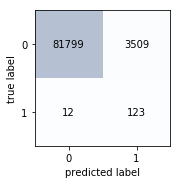

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85308
          1       0.03      0.91      0.07       135

avg / total       1.00      0.96      0.98     85443



In [25]:
# changing threshold to improve precision
y_pred_class = binarizing(y_pred_prob,0.006)
confusion_matrix(y_test,y_pred_class)

## Use Random forest to directly predict probablity and binarize it

Accuracy % is:  [99.774]
-------------------
Recall % is:  [81.481]
-------------------
Precision % is:  [39.568]
-------------------
COnfusion matrix


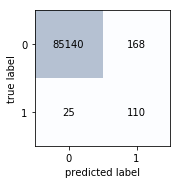

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.40      0.81      0.53       135

avg / total       1.00      1.00      1.00     85443



In [50]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators = 5)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
prediction_from_proba = (clf.predict_proba(X_test)[:,1]>0.001).astype(int)
confusion_matrix(y_test,prediction_from_proba)

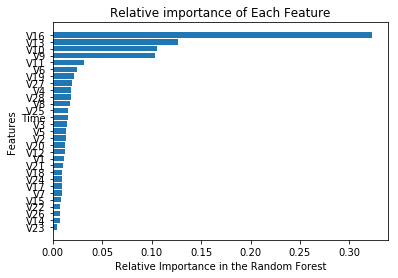

In [51]:
importance_list = clf.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [52]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_Amount'],
      dtype='object')

In [54]:
new_X_train = X_train[['V16','V13','V10','V9']]
new_X_test = X_test[['V16','V13','V10','V9']]

Accuracy % is:  [99.89]
-------------------
Recall % is:  [40.741]
-------------------
Precision % is:  [79.71]
-------------------
COnfusion matrix


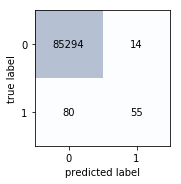

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.80      0.41      0.54       135

avg / total       1.00      1.00      1.00     85443



In [56]:
y_pred_prob = gridsearch_log_reg_without_proba(new_X_train,y_train,new_X_test)
confusion_matrix(y_test,y_pred_prob)

# Another way of handling the imbalanced data is over-sampling minority class or under-sampling majority class

In [27]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks

from imblearn.over_sampling import RandomOverSampler, SMOTE

from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier

from collections import Counter

In [28]:
def class_prop(y_res):
    fr = np.count_nonzero(y_res)
    n_fr = y_res .shape[0] - fr
    fig = plt.figure(figsize=(10, 10))

    ax1 = fig.add_subplot(221)
    ax1.pie([fr,n_fr],
            labels=['fraud: ' + str(fr), 'non_fraud: ' + str(n_fr)], 
            colors=['red', 'gold'],
            autopct='%1.1f%%', shadow=True, startangle=90)

### Using Regularized Logistic regression (without prediciting probablity)

In [29]:
def gridsearch_log_reg_without_proba(X_train,y_train,X_test):
    # grid search for best combination of C and penalty
    from sklearn.grid_search import GridSearchCV
    pipe = make_pipeline( LogReg())
    C_range = 10.**np.arange(-2, 3)
    penalty_options = ['l1', 'l2']
    param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    
   #store the predicted probabilities for class 1
    y_pred = grid.predict(X_test)
    return y_pred

## Using Regularized Logisitc regression with class-weights

In [30]:
def gridsearch_log_reg_without_proba_withclasswgt(X_train,y_train,X_test):
    # grid search for best combination of C and penalty
    pipe1 = make_pipeline(LogReg(class_weight='balanced'))
    from sklearn.grid_search import GridSearchCV
    C_range = 10.**np.arange(-2, 3)
    penalty_options = ['l1', 'l2']
    param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
    grid = GridSearchCV(pipe1, param_grid, cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    
   #store the predicted probabilities for class 1
    y_pred = grid.predict(X_test)
    return y_pred

Accuracy % is:  [98.166]
-------------------
Recall % is:  [89.63]
-------------------
Precision % is:  [7.228]
-------------------
COnfusion matrix


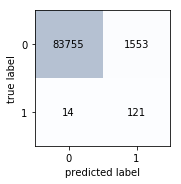

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85308
          1       0.07      0.90      0.13       135

avg / total       1.00      0.98      0.99     85443



In [31]:
#With class weights
y_pred = gridsearch_log_reg_without_proba_withclasswgt(X_train,y_train,X_test)
confusion_matrix(y_test,y_pred)

# Using Random Undersampling

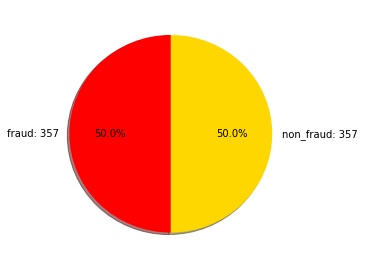

In [32]:
rus = RandomUnderSampler(ratio='majority')
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
class_prop(y_resampled)

Accuracy % is:  [99.915]
-------------------
Recall % is:  [57.778]
-------------------
Precision % is:  [82.979]
-------------------
COnfusion matrix


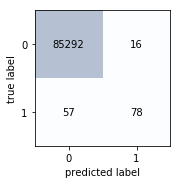

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.83      0.58      0.68       135

avg / total       1.00      1.00      1.00     85443



In [33]:
# Without class-wgts
y_pred = gridsearch_log_reg_without_proba(X_train,y_train,X_test)
confusion_matrix(y_test,y_pred)

Accuracy % is:  [98.16]
-------------------
Recall % is:  [87.407]
-------------------
Precision % is:  [7.053]
-------------------
COnfusion matrix


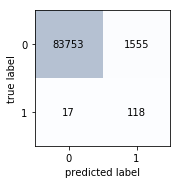

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85308
          1       0.07      0.87      0.13       135

avg / total       1.00      0.98      0.99     85443



In [34]:
# With class-wgts
y_pred = gridsearch_log_reg_without_proba_withclasswgt(X_resampled,y_resampled,X_test)
confusion_matrix(y_test,y_pred)

Accuracy % is:  [99.368]
-------------------
Recall % is:  [84.444]
-------------------
Precision % is:  [18.009]
-------------------
COnfusion matrix


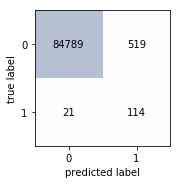

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85308
          1       0.18      0.84      0.30       135

avg / total       1.00      0.99      1.00     85443



In [35]:
# With binarizing
y_pred_prob = gridsearch_log_reg(X_resampled,y_resampled,X_test)
y_pred_class = binarizing(y_pred_prob,0.9)
confusion_matrix(y_test,y_pred_class)

# Using over-sampling 

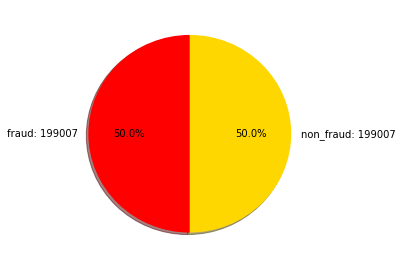

In [36]:
os = SMOTE()
X_resampled, y_resampled = os.fit_sample(X_train, y_train)
class_prop(y_resampled)

Accuracy % is:  [97.906]
-------------------
Recall % is:  [89.63]
-------------------
Precision % is:  [6.382]
-------------------
COnfusion matrix


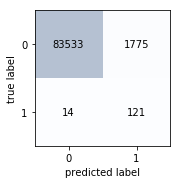

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85308
          1       0.06      0.90      0.12       135

avg / total       1.00      0.98      0.99     85443



In [37]:
# With class-wgts
y_pred = gridsearch_log_reg_without_proba_withclasswgt(X_resampled,y_resampled,X_test)
confusion_matrix(y_test,y_pred)

Accuracy % is:  [99.94]
-------------------
Recall % is:  [79.259]
-------------------
Precision % is:  [82.308]
-------------------
COnfusion matrix


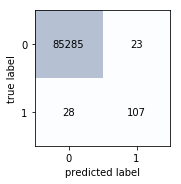

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.82      0.79      0.81       135

avg / total       1.00      1.00      1.00     85443



In [38]:
clf= RandomForestClassifier()
clf.fit(X_resampled,y_resampled)
y_pred_RFC = clf.predict(X_test)
confusion_matrix(y_test,y_pred_RFC)

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features.

In [39]:
## Feature Engineering

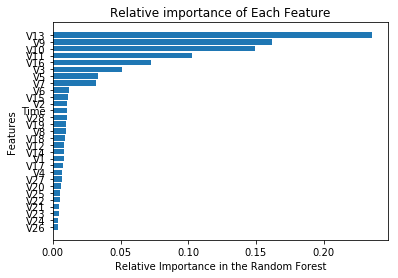

In [40]:
importance_list = clf.feature_importances_
name_list = data.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [41]:
new_X_train = X_train[['V13','V9','V10','V3','V11','V16','V15','V2']]
new_X_test = X_test[['V13','V9','V10','V3','V11','V16','V15','V2']]

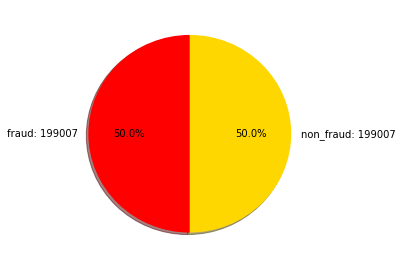

In [42]:
os = SMOTE()
X_resampled, y_resampled = os.fit_sample(new_X_train, y_train)
class_prop(y_resampled)

Accuracy % is:  [99.912]
-------------------
Recall % is:  [75.556]
-------------------
Precision % is:  [70.833]
-------------------
COnfusion matrix


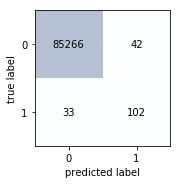

-------------------
Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.71      0.76      0.73       135

avg / total       1.00      1.00      1.00     85443



In [43]:
clf= RandomForestClassifier(n_estimators=10)
clf.fit(X_resampled,y_resampled)
y_pred_RFC = clf.predict(new_X_test)
confusion_matrix(y_test,y_pred_RFC)

In [49]:
y_resampled.shape

(398014,)

In [44]:
from sklearn.feature_selection import RFE

In [45]:
#os = SMOTE()
#X_resampled, y_resampled = os.fit_sample(X_train, y_train)
#class_prop(y_resampled)

#clf= RandomForestClassifier(n_estimators=100)
#rfe = RFE(clf,5)
#rfe = rfe.fit(X_resampled, y_resampled)
#print(rfe.ranking_)

1. again PCA perform and see if boundary is easy?
2. gradient booosted trees
3. binarize

